# Exercise 3:
## Measuring Galaxy Shapes using GALFIT

Fit a 2D Sersic function to a galaxy image using the GALFIT software. 

STEPS

- Install the GALFIT sofware
  (see https://users.obs.carnegiescience.edu/peng/work/galfit/galfit.html)

- Read and display galaxy image and PSF image
  
- Using the starting parameters given below, create a GALFIT input file within your python code

- Run GALFIT on the galaxy image within your python code 

- Extract and print the GALFIT output parameters 
  (x,y,integrated magnitude, effective radius, Sersic index, axis ratio, position angle, sky background)

- Display original, model and residual image of the best fit returned by GALFIT


## Import Modules 

In [1]:
%matplotlib inline

#plot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# read fits image
from astropy.io import fits
import numpy as np

# cutout of fits image
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D

import os
import os.path

#regular expression operations module re.py
import re

#read and write tables
import pandas as pd

#call sex, psfex, galfit
from subprocess import call
gf = '/home/patrick/galfit'

#GALFIT

#If starting values are free to change or not
fixn=1  #value free to change
fixy=0  #value cannot change

size = 170  #Image region to fit (xmin xmax ymin ymax)(1,170,1,170)
conv = 170  #Size of the convolution box (x y)
magzero = 29.61  #Magnitude photometric zeropoint
pixscale = 0.56  #Plate scale (dx dy)   [arcsec per pixel]

#starting values for fit
xin = 87.
yin = 62.
magin = 21.6#magnitude
rein = 2.95#radius inertial
sersicnin = 4.07#sertial index
ellin = 0.61
pain = -168.1
skyin = 511.5#skybackground
#Let everywhere change value, fixn


## Read galaxy and PSF image and display them

In [2]:
NGC4690_clean = ('NGC4690-121-clean.fits')
NGC4960_snap = ('snap_NGC4690.fits')#PSF
image_clean = fits.getdata(NGC4690_clean, ext=0)
image_snap = fits.getdata(NGC4960_snap, ext=0)

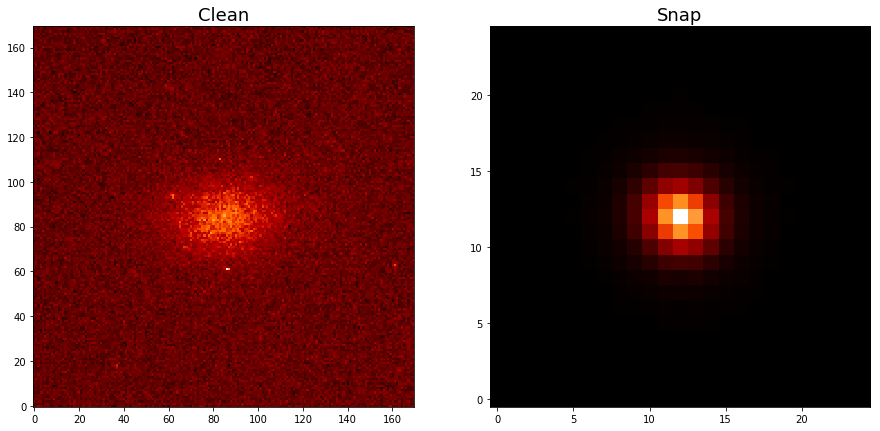

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
im0 = ax[0].imshow(image_clean, cmap='gist_heat',origin='lower')
ax[0].set_title("Clean", fontsize = 18)
ax[1].imshow(image_snap, cmap='gist_heat',origin='lower')
im1 = ax[1].set_title("Snap", fontsize = 18)

## Create the Galfit input parameter file

In [4]:
temp = open("parameters.galfit", "w")

temp.write("# IMAGE PARAMETERS\n")
temp.write("A) NGC4690-121-clean.fits             # Input data image (FITS file)\n")
temp.write("B) NGC4690-output.fits       # Name for the output image\n")
temp.write("C) none                # Sigma image name (made from data if blank or ""none"") \n")
temp.write("D) snap_NGC4690.fits kernel     # Input PSF image and (optional) diffusion kernel\n")
temp.write("E) 1                   # PSF oversampling factor relative to data\n")
temp.write("F) none           # Pixel mask (ASCII file or FITS file with non-0 values)\n")
temp.write("G) none         # Parameter constraint file (ASCII)\n")
temp.write("H) 1 " + str(size) + " 1 " + str(size)+"     # Image region to fit (xmin xmax ymin ymax)\n")
temp.write("I) " +str(size)+" "+str(size)+"             # Size of convolution box (x y)\n")
temp.write("J) "+str(magzero)+"           # Magnitude photometric zeropoint\n")
temp.write("K) "+str(pixscale)+" "+str(pixscale)+"         # Plate scale (dx dy)  [arcsec/pix]\n")
temp.write("O) regular                # Display type (regular, curses, both)\n")
temp.write("P) 0                   # Create output image only? (1=yes; 0=optimize) \n")
temp.write("S) 0                   # Modify/create objects interactively?\n")

temp.write("\n# Start a list of objects below here......\n\n")

temp.write("# Object number: 1\n")
temp.write("0) sersic             # Object type\n")
temp.write("1) "+str(xin)+" "  +str(yin)+"  1 1    # position x, y        [pixel]\n")
temp.write("3) "+str(magin)+"      1       # total magnitude \n")   
temp.write("4) "+str(rein)+"       1       #     R_e              [Pixels]\n")
temp.write("5) "+str(sersicnin)+"       1       # Sersic exponent (deVauc=4, expdisk=1)  \n")
temp.write("9) "+str(ellin)+"       1       # axis ratio (b/a)\n")   
temp.write("10) "+str(pain)+"       1       # position angle (PA)  [Degrees: Up=0, Left=90]\n")
temp.write("Z) 0                  # Output option (0 = residual, 1 = Don't subtract) \n\n")

temp.write("# Object number: 2\n")
temp.write(" 0) sky                    #  object type\n")
temp.write(" 1) "+str(skyin)+"      1          #  sky background at center of fitting region [ADUs]\n")
temp.write(" 2) 0.0000      0          #  dsky/dx (sky gradient in x)\n")
temp.write(" 3) 0.0000      0          #  dsky/dy (sky gradient in y)\n")
temp.write(" Z) 0                      #  output option (0 = resid., 1 = Don't subtract) \n")
    
temp.close()

## Run Galfit

In [5]:
#call galfit with inputfile
call([gf, "parameters.galfit"])

0

## Extract and print the Galfit parameters

In [6]:
fitparam = open(open("fit.log").readlines()[4][18:27]).readlines()#Look up name for newest fit
for i,line in enumerate(fitparam):
    if re.search("parameter description",line) != None:
        for j in range(i-1, len(fitparam)):
            print(fitparam[j])

# ------------------------------------------------------------------------------

#   par)    par value(s)    fit toggle(s)    # parameter description 

# ------------------------------------------------------------------------------



# Component number: 1

 0) sersic                 #  Component type

 1) 86.3534  84.8412  1 1  #  Position x, y

 3) 18.8215     1          #  Integrated magnitude 

 4) 22.8562     1          #  R_e (effective radius)   [pix]

 5) 0.6942      1          #  Sersic index n (de Vaucouleurs n=4) 

 6) 0.0000      0          #     ----- 

 7) 0.0000      0          #     ----- 

 8) 0.0000      0          #     ----- 

 9) 0.6631      1          #  Axis ratio (b/a)  

10) -84.9027    1          #  Position angle (PA) [deg: Up=0, Left=90]

 Z) 0                      #  Skip this model in output image?  (yes=1, no=0)



# Component number: 2

 0) sky                    #  Component type

 1) 511.2493    1          #  Sky background at center of fitting regio

## Display original, model and residual images

In [7]:
data_fitimage = ("NGC4690-output.fits")
image_1 = fits.getdata(data_fitimage, ext=1)#Original
image_2 = fits.getdata(data_fitimage, ext=2)#Model
image_3 = fits.getdata(data_fitimage, ext=3)#Residual

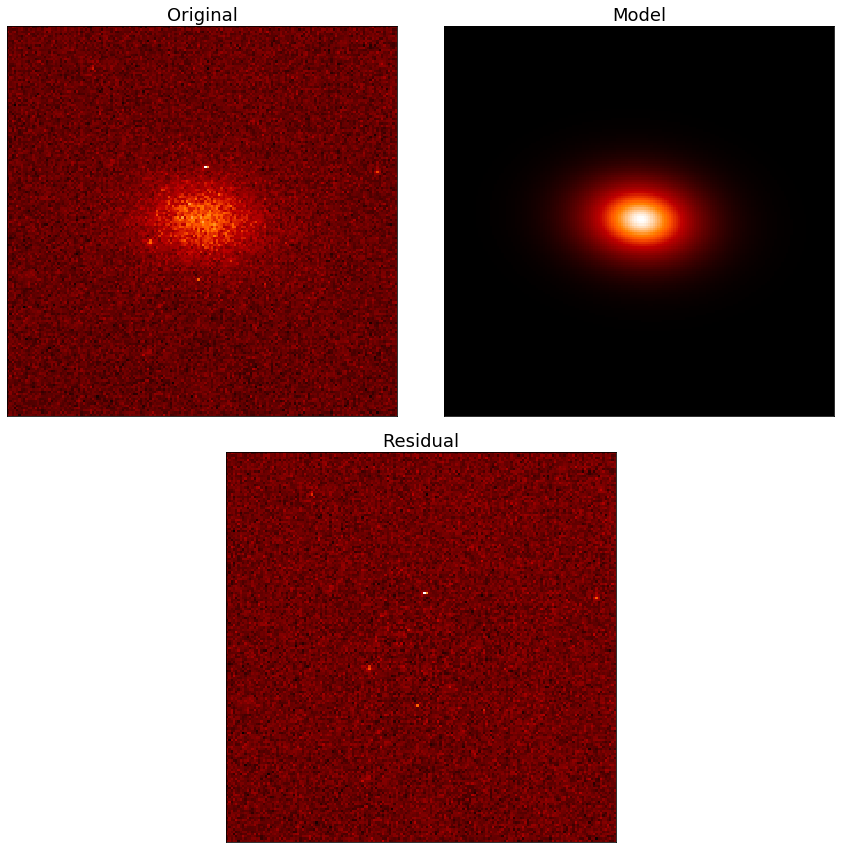

In [8]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((4,4),(0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((4,4),(0,2), colspan=2, rowspan=2)
ax3 = plt.subplot2grid((4,4),(2,1), colspan=2, rowspan=2)

ax1.imshow(image_1, cmap='gist_heat')
ax1.set_title("Original", fontsize = 18)
ax2.imshow(image_2, cmap='gist_heat')
ax2.set_title("Model", fontsize = 18)
ax3.imshow(image_3, cmap='gist_heat')
ax3.set_title("Residual", fontsize = 18);
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

## Diameter
- The distance of the galyxy is D = 40.2Mpc
- From the fit we know the effective radius of 22.8562pix
- This corresponds to an angle of (22.8562*0.56)''
- Therefore the diamater is __2.5kpc__

In [9]:
(22.8562*0.56)/3600 * np.pi/180 * 40200

2.494554372904531

## Absolute magnitude
- The fit shows an integrated magnitude of 18.8215
- Therefore the absolute magnitude is M = m -5*(Log10(D$_{pc}$)-1) = __-14.2__

In [10]:
18.8215 - 5*(np.log10(40.2*10**6)-1)

-14.19963026542235

## Animated version

In [11]:
fig = plt.figure(figsize=(7,7));

im1 = plt.imshow(image_1, cmap='gist_heat', animated=True);
im2 = plt.imshow(image_2, cmap='gist_heat', animated=True);
im3 = plt.imshow(image_3, cmap='gist_heat', animated=True);

ims = [[im1],[im2],[im3]]

ani = animation.ArtistAnimation(fig, ims, blit=False, interval=1000);   
plt.close();

HTML(ani.to_jshtml())